In [1]:
import numpy as np
import numpy.polynomial.polynomial as poly
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings
import json

warnings.filterwarnings('ignore')

In [2]:
def get_trans_single_ret(df, idx) -> list:
    trans_1310 = []
    
    for i in range(idx, len(df['wavelength']), 3):
        wavel = np.array(df['wavelength'][i])
        trans = df['transmission_ch1'][i]
        if len(trans) == 0:
            pass
        else:
            coefs = poly.polyfit(wavel, trans, 12)
            ffit = poly.Polynomial(coefs)
            trans_1310.append(ffit(1310))
            
        # fig, ax = plt.subplots(1, 1, figsize=(7, 5))
        # ax.plot(wavel, trans, label='measured')
        # ax.plot(wavel, ffit(wavel), '--', label='fitted')
        # ax.set_xlabel('Wavelength (nm)')
        # ax.set_ylabel('Transmission (dB)')
        # plt.show()
    
    return trans_1310

In [19]:
p_current = Path().resolve().parent
root = p_current / 'results' / 'BO_wafer3_data' /'nit_loss_variation_test_cells_BO_wafer3'

# Nitride WG
widths = [0.8, 1.2, 2.0]
w = 2

# # Ridge WG
# widths = [0.44, 0.7]
# w = 0.7

wg_trans = []
wg_trans_all = {}

data_dir_gen = sorted(root.glob('reticle*/*.json'))
for d in data_dir_gen:
    df = pd.read_json(d)
    ret = int(df['reticle'][0])
    wg_trans_single_ret = get_trans_single_ret(df, widths.index(w))
    wg_trans += wg_trans_single_ret
    wg_trans_all[ret] = wg_trans_single_ret

print(np.var(wg_trans))

# fdir = root / f'nit_trans_var_1.2um.json'
# if fdir.exists():
#     print('This file already exists!')
# else:
#     with open(fdir, 'w') as fp:
#             json.dump(nit_trans_var, fp)

0.8460886199582829


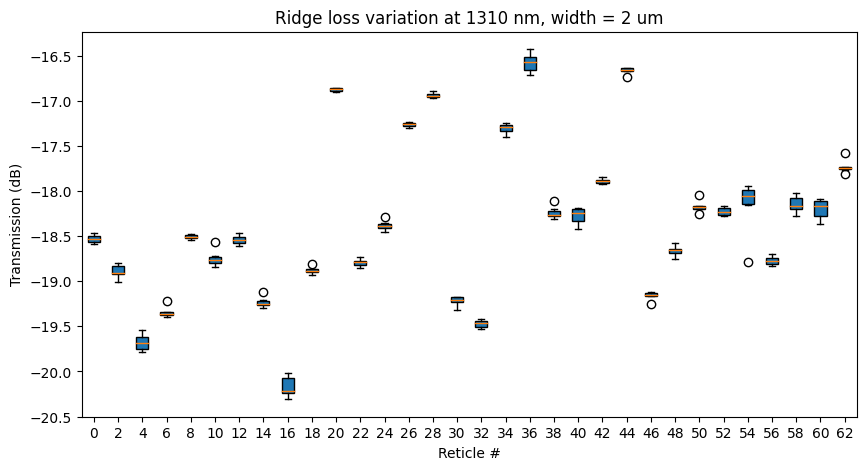

In [20]:
# Create a boxplot
sorted_dict = {key:wg_trans_all[key] for key in sorted(wg_trans_all.keys())}
data = list(sorted_dict.values())[::2]
labels = list(sorted_dict.keys())[::2]

fig, ax = plt.subplots(1, 1, figsize=[10, 5])
ax.boxplot(data, patch_artist=True, labels=labels, showfliers=True)
ax.set_title(f'Ridge loss variation at 1310 nm, width = {w} um')
ax.set_xlabel('Reticle #')
ax.set_ylabel('Transmission (dB)')
# ax.set_ylim([-18.4, -15.8])
plt.show()

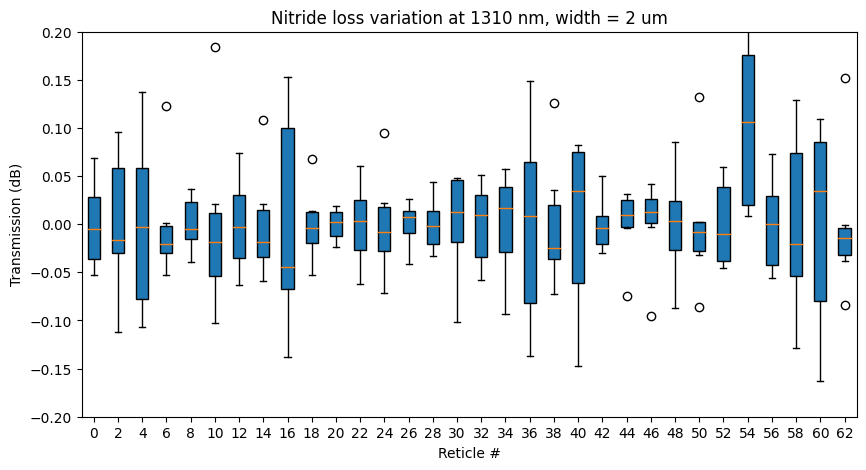

In [22]:
# Create a boxplot: data shifted by average
normalized_dict = {ret:np.subtract(trans, np.average(trans)) for ret, trans in sorted_dict.items()}
normalized_data = list(normalized_dict.values())[::2]
labels = list(normalized_dict.keys())[::2]

fig, ax = plt.subplots(1, 1, figsize=[10, 5])
ax.boxplot(normalized_data, patch_artist=True, labels=labels)

# Add title and labels to the plot
ax.set_title(f'Nitride loss variation at 1310 nm, width = {w} um')
ax.set_xlabel('Reticle #')
ax.set_ylabel('Transmission (dB)')
ax.set_ylim([-0.2, 0.2])

# Show the plot
plt.show()